In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import g3py as g3
import pymc3 as pm
import theano as th
import theano.tensor as tt

g3.style_big_seaborn()
g3.style_widget()

/opt/anaconda3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Samples DataSets

In [2]:
x, y = g3.data_sunspots()
y /= y.max()
obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, 0.1, plot=False)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.

Total: 309 | Obs: 30 (9.70873786407767%)


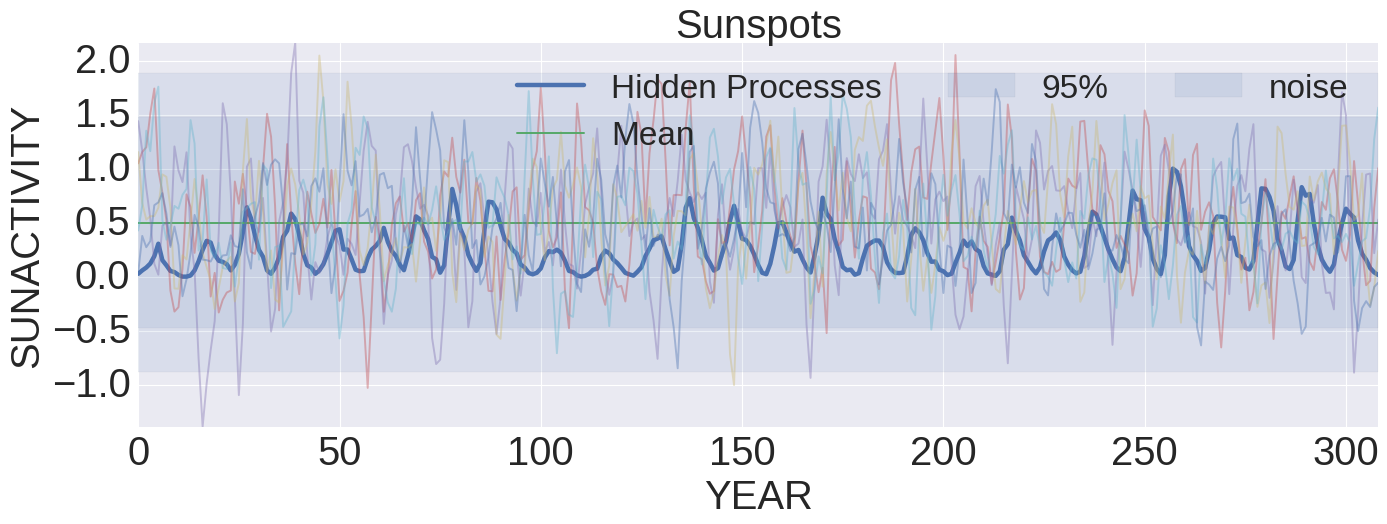

(<g3py.processes.gaussian.TransformedGaussianProcess at 0x7f4ff77d87f0>,
 [TGP_Bias_Bias, TGP_SE_var_log_, TGP_SE_rate_log_, TGP_Noise_var_log_],
 {'posterior_dlogp': <g3py.libs.tensors.makefn at 0x7f4ff7a734a8>,
  'posterior_logp': <g3py.libs.tensors.makefn at 0x7f4ff7725be0>,
  'posterior_mean': <g3py.libs.tensors.makefn at 0x7f502f2a9b38>,
  "posterior_quantiler_noise{'q': 0.025}": <g3py.libs.tensors.makefn at 0x7f502cccf6a0>,
  "posterior_quantiler_noise{'q': 0.975}": <g3py.libs.tensors.makefn at 0x7f502cf21c50>,
  "posterior_quantiler{'q': 0.025}": <g3py.libs.tensors.makefn at 0x7f502ec97668>,
  "posterior_quantiler{'q': 0.975}": <g3py.libs.tensors.makefn at 0x7f504e3fd0f0>,
  "posterior_sampler{'samples': 5}": <g3py.libs.tensors.makefn at 0x7f502cdebb38>,
  'posterior_std_noise': <g3py.libs.tensors.makefn at 0x7f502d63fba8>,
  'prior_mean': <g3py.libs.tensors.makefn at 0x7f4ff7c175c0>,
  "prior_quantiler_noise{'q': 0.025}": <g3py.libs.tensors.makefn at 0x7f504d845898>,
  "prior_q

In [35]:
#gm = g3.GraphicalModel(name='Bayes', description='Holi', file='bayes.pkl', reset=True)
gp = g3.TGP(space=x, hidden=y, location=g3.Bias(), kernel=g3.SE(), mapping=g3.Identity(), noise=True)
gp.describe('Sunspots','YEAR','SUNACTIVITY')
gp.plot(samples=5), g3.show()
gp.observed(inputs=x_obs, outputs=y_obs)
gp.plot_observations(), g3.show()
gp.plot(samples=5)
g3.plot_save('images/gp_sunspots0.pdf'), g3.show()

gp, gp.active, gp.active.model, gp.active.model.vars, gp.compiles, gp.params, gp.logp(gp.params), gp.scores(gp.params, logp=False)

{'TGP_Bias_Bias': 0.16684803, 'TGP_SE_rate_log_': array([-0.70749032], dtype=float32), 'TGP_SE_var_log_': -3.9173653, 'TGP_Noise_var_log_': 1.4230808} 
 -49.212135314941406 {'BiasL1': 0.17058541, 'BiasL2': 0.053876191}


{'TGP_Bias_Bias': -0.032498639, 'TGP_SE_rate_log_': array([-2.26201296], dtype=float32), 'TGP_SE_var_log_': -5.7326751, 'TGP_Noise_var_log_': -6.970015} 
 -446.2041320800781 {'BiasL1': 0.18079688, 'BiasL2': 0.054787844}


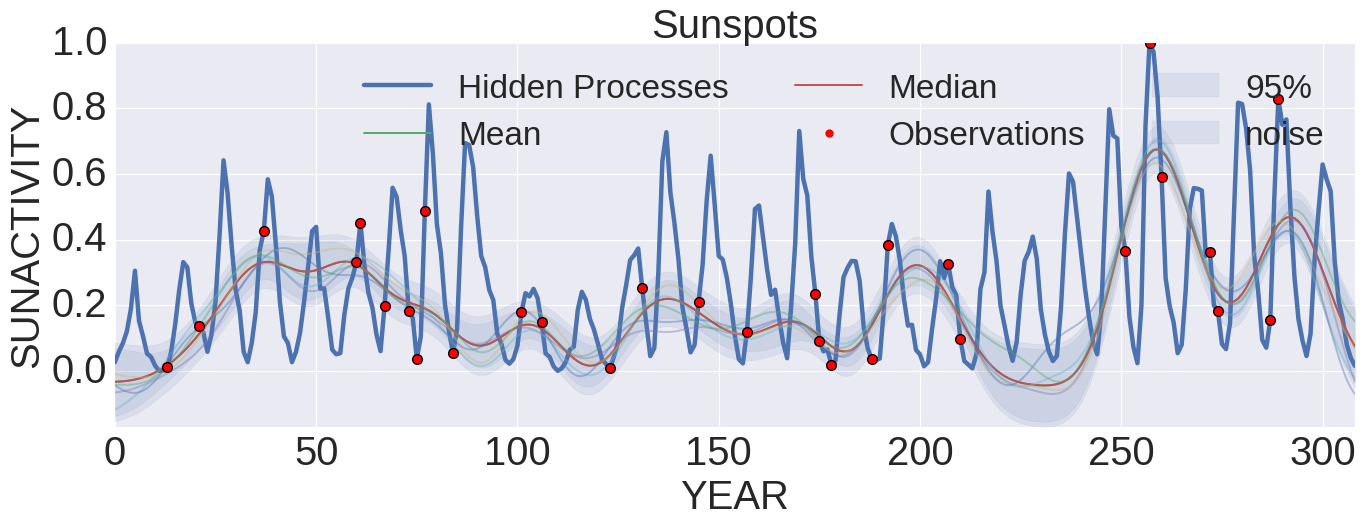

{'TGP_Bias_Bias': 0.16916452, 'TGP_SE_rate_log_': array([ 0.10749501], dtype=float32), 'TGP_SE_var_log_': -1.9198834, 'TGP_Noise_var_log_': -6.7689843} 
 -4.863679885864258 {'BiasL1': 0.1417245, 'BiasL2': 0.039893407}


{'TGP_Bias_Bias': -0.068457022, 'TGP_SE_rate_log_': array([-3.58801293], dtype=float32), 'TGP_SE_var_log_': 2.2436767, 'TGP_Noise_var_log_': -1.2749851} 
 -28.292343139648438 {'BiasL1': 0.18780255, 'BiasL2': 0.055622112}


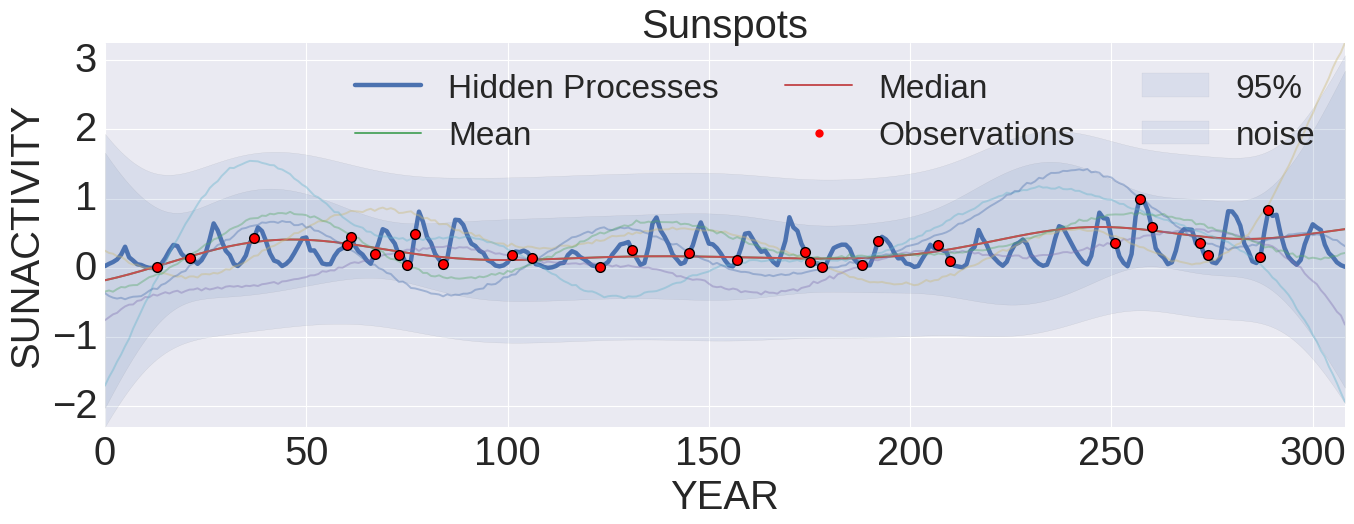

{'TGP_Bias_Bias': 0.099021964, 'TGP_SE_rate_log_': array([-0.31922749], dtype=float32), 'TGP_SE_var_log_': -2.9714878, 'TGP_Noise_var_log_': -7.2876911} 
 -5.316692352294922 {'BiasL1': 0.15145928, 'BiasL2': 0.048651434}


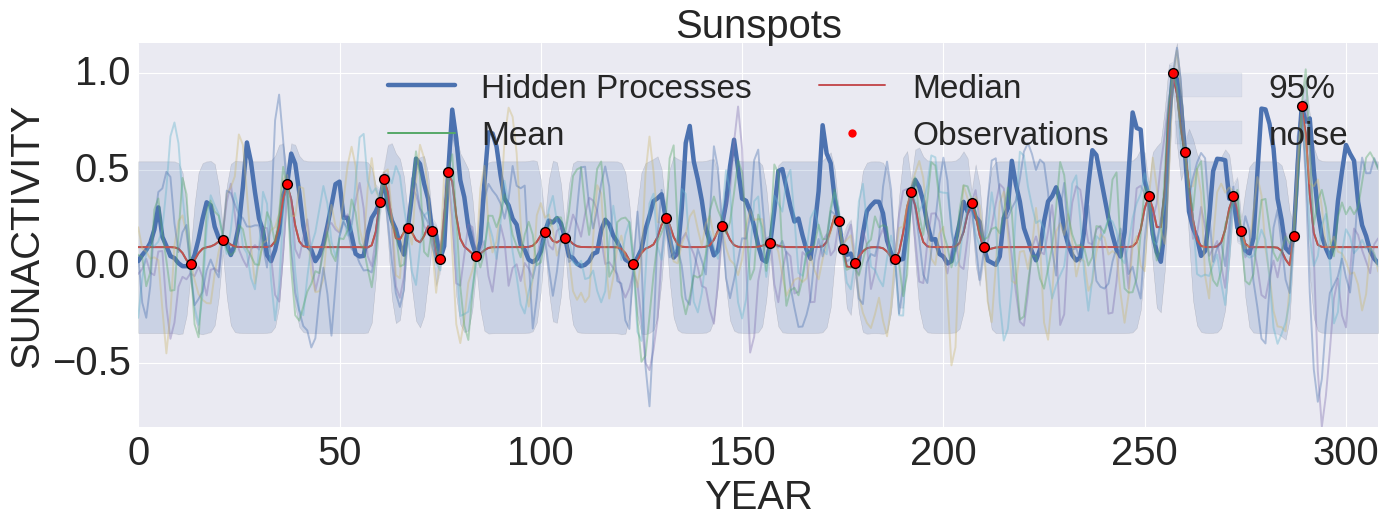

{'TGP_Bias_Bias': 0.57450706, 'TGP_SE_rate_log_': array([-0.95782173], dtype=float32), 'TGP_SE_var_log_': -7.1252751, 'TGP_Noise_var_log_': 2.0522149} 
 -58.642723083496094 {'BiasL1': 0.34077972, 'BiasL2': 0.14299755}


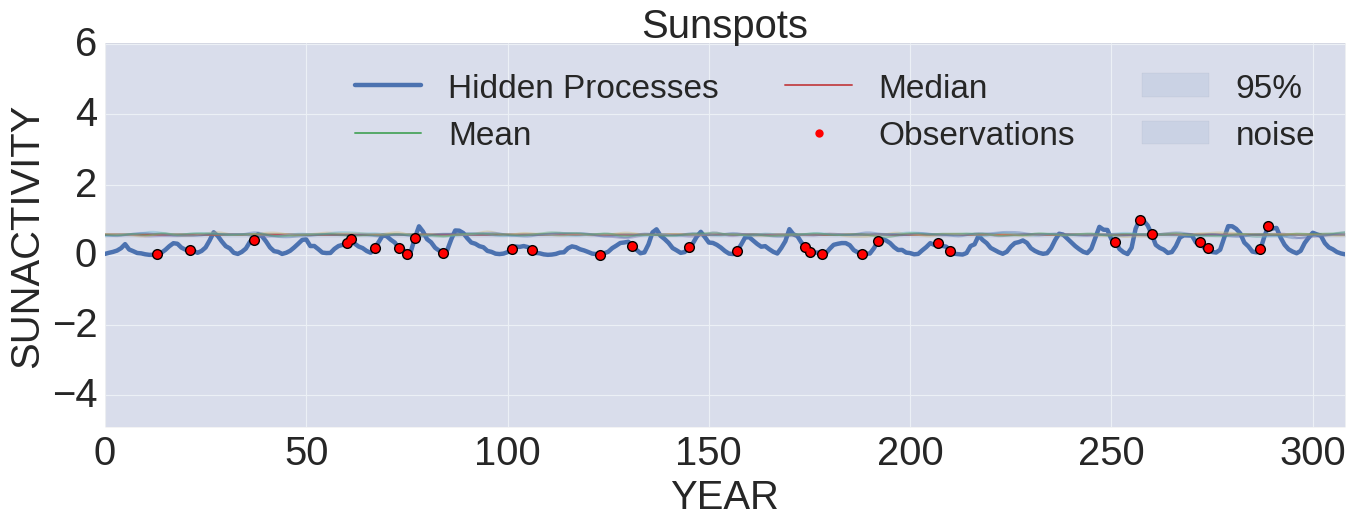

{'TGP_Bias_Bias': -0.10596534, 'TGP_SE_rate_log_': array([-5.84232044], dtype=float32), 'TGP_SE_var_log_': -3.1065152, 'TGP_Noise_var_log_': -6.1171541} 
 -246.73269653320312 {'BiasL1': 0.16993597, 'BiasL2': 0.044703208}


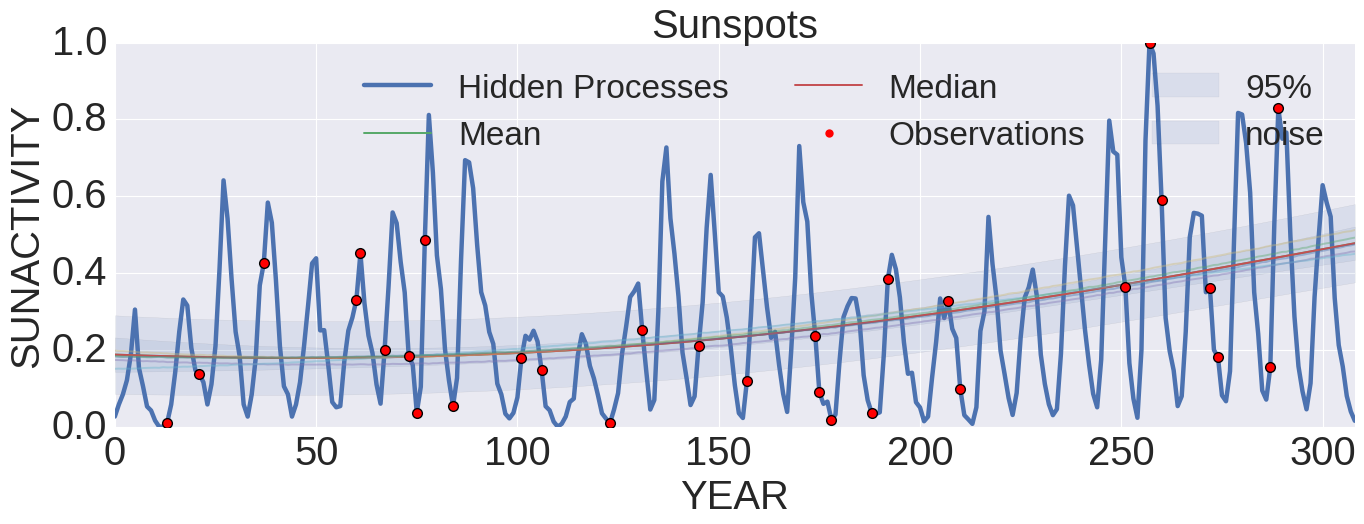

{'TGP_Bias_Bias': 0.47978574, 'TGP_SE_rate_log_': array([-4.88557816], dtype=float32), 'TGP_SE_var_log_': -0.028653303, 'TGP_Noise_var_log_': -6.4393125} 
 -276.6132507324219 {'BiasL1': 0.17338529, 'BiasL2': 0.047392428}


{'TGP_Bias_Bias': -0.10273439, 'TGP_SE_rate_log_': array([-0.44462487], dtype=float32), 'TGP_SE_var_log_': -7.7157617, 'TGP_Noise_var_log_': 0.53493202} 
 -37.24338150024414 {'BiasL1': 0.36427593, 'BiasL2': 0.17777796}


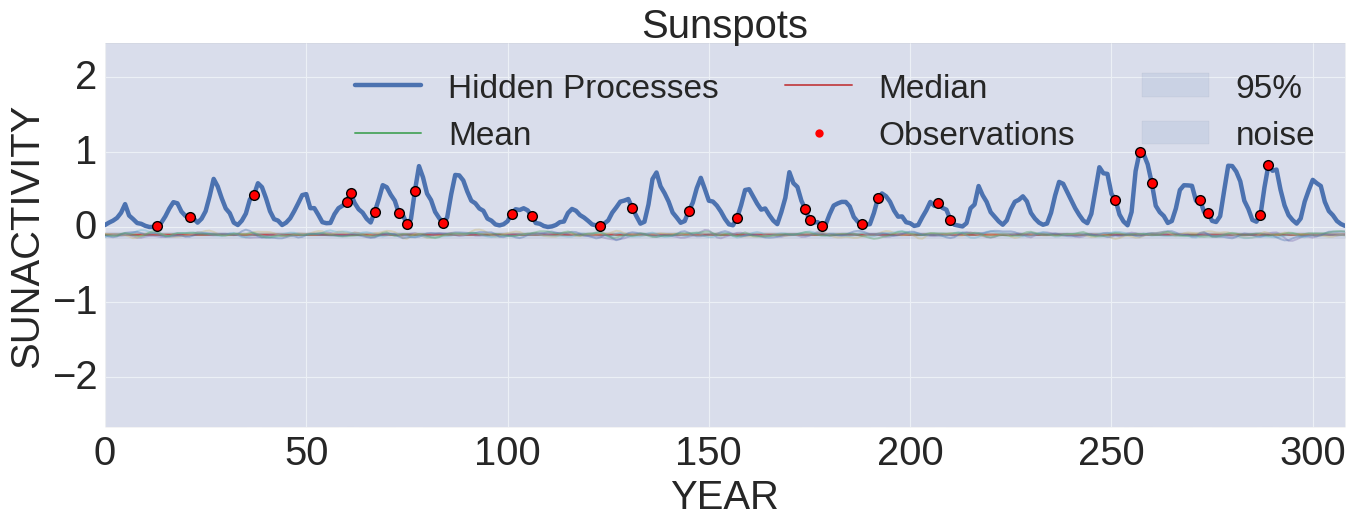

{'TGP_Bias_Bias': 0.30561051, 'TGP_SE_rate_log_': array([-1.71484089], dtype=float32), 'TGP_SE_var_log_': -1.712934, 'TGP_Noise_var_log_': -1.3268261} 
 -16.46310043334961 {'BiasL1': 0.17039467, 'BiasL2': 0.0420187}


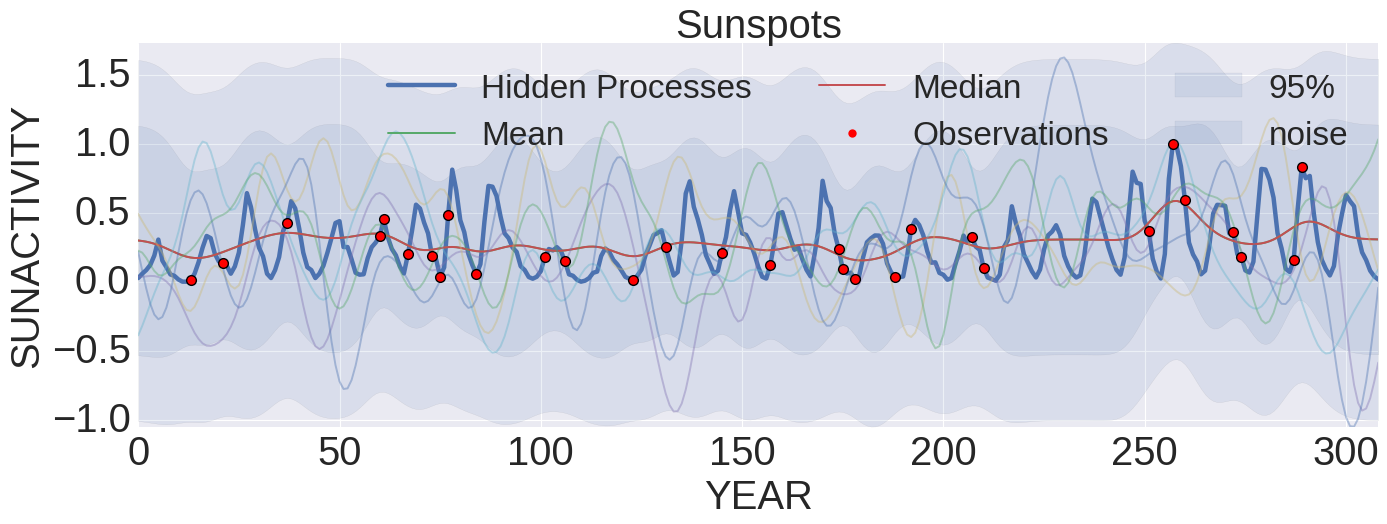

In [37]:
for k in range(10):
    params = gp.active.params_random(sigma=1)
    print(params,'\n' ,gp.logp(params), gp.scores(params, logp=False))
    gp.plot(params, samples=5, median=True)
    g3.show()

In [38]:
gp.widget(samples=5, median=True)

Widget Javascript not detected.  It may not be installed or enabled properly.


In [39]:
gp.plot(gp.params_widget, samples=5)
g3.plot_save('images/gp_sunspots1.pdf')
gp.params_widget, gp.logp(gp.params_widget), gp.scores(gp.params_widget, logp=False)

({'TGP_Bias_Bias': array(0.2633017897605896, dtype=float32),
  'TGP_Noise_var_log_': array(-2.9265804290771484, dtype=float32),
  'TGP_SE_rate_log_': array([-2.80621004], dtype=float32),
  'TGP_SE_var_log_': array(-2.9265804290771484, dtype=float32)},
 array(-0.2735099792480469, dtype=float32),
 {'BiasL1': 0.16793512, 'BiasL2': 0.043368183})

In [47]:
gp.plot(gp.active.params_default)
g3.show()
params_map = gp.find_MAP(gp.active.params_default, points=4)
gp.plot(params_map)

Starting function value (-logp): 0.646652

start_bfgs
         Current function value: 0.628803
         Iterations: 1
         Function evaluations: 82
         Gradient evaluations: 70

start_powell
Optimization terminated successfully.
         Current function value: -2.512833
         Iterations: 4
         Function evaluations: 234

start_bfgs_powell
Optimization terminated successfully.
         Current function value: -2.512829
         Iterations: 4
         Function evaluations: 230

start_powell_bfgs
         Current function value: -2.512833
         Iterations: 0
         Function evaluations: 74
         Gradient evaluations: 62


In [57]:
gp.active.model.fastlogp(gp.active.params_default)

array(-0.6466522216796875, dtype=float32)

In [59]:
with gp.active.model:
    params_map = pm.find_MAP(gp.active.params_default)

ValueError: Elemwise{sub,no_inplace}.grad returned object of shape (2,) as gradient term on input 0 of shape (30,)

In [58]:
gp.logp(gp.active.params_default)

array(-0.6466522216796875, dtype=float32)

In [48]:
gp.compiles

{'array_posterior_dlogp': <g3py.libs.tensors.makefn at 0x7f4ff5d2d4a8>,
 'array_posterior_logp': <g3py.libs.tensors.makefn at 0x7f5044c45828>,
 'posterior_dlogp': <g3py.libs.tensors.makefn at 0x7f4ff7a734a8>,
 'posterior_logp': <g3py.libs.tensors.makefn at 0x7f4ff7725be0>,
 'posterior_mean': <g3py.libs.tensors.makefn at 0x7f502f2a9b38>,
 'posterior_median': <g3py.libs.tensors.makefn at 0x7f4ff6ac5c18>,
 "posterior_quantiler_noise{'q': 0.025}": <g3py.libs.tensors.makefn at 0x7f502cccf6a0>,
 "posterior_quantiler_noise{'q': 0.975}": <g3py.libs.tensors.makefn at 0x7f502cf21c50>,
 "posterior_quantiler{'q': 0.025}": <g3py.libs.tensors.makefn at 0x7f502ec97668>,
 "posterior_quantiler{'q': 0.975}": <g3py.libs.tensors.makefn at 0x7f504e3fd0f0>,
 "posterior_sampler{'samples': 5}": <g3py.libs.tensors.makefn at 0x7f502cdebb38>,
 'posterior_std_noise': <g3py.libs.tensors.makefn at 0x7f502d63fba8>,
 'prior_mean': <g3py.libs.tensors.makefn at 0x7f4ff7c175c0>,
 "prior_quantiler_noise{'q': 0.025}": <g3

In [49]:
gp.compiles.array_posterior_dlogp(gp.active.dict_to_array(params_map))

array([ 0.00386322,  0.0012349 ,  0.00017074, -0.00180789], dtype=float32)

In [50]:
from scipy.optimize import minimize

In [51]:
params = gp.active.params_random(prop=False)
params, gp.logp(params)

({'TGP_Bias_Bias': 0.23660005033016204,
  'TGP_Noise_var_log_': -2.8454642474651335,
  'TGP_SE_rate_log_': array([-2.24309397], dtype=float32),
  'TGP_SE_var_log_': -2.9878374218940733},
 array(-0.787811279296875, dtype=float32))

In [53]:
minimize(lambda x: -gp.compiles.array_posterior_logp(x), 
         gp.active.dict_to_array(params), args=(), method='BFGS',
         jac= lambda x: -gp.compiles.array_posterior_dlogp(x), tol=None, callback=None, 
         options={'disp': False, 'gtol': 1e-05, 'eps': 1.4901161193847656e-08, 'return_all': False, 'maxiter': None, 'norm': np.inf})

      fun: 0.78781128
 hess_inv: array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])
      jac: array([-3.39488244,  2.81841612,  0.61416918,  3.7170155 ], dtype=float32)
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 88
      nit: 0
     njev: 76
   status: 2
  success: False
        x: array([-2.84546423, -2.24309397, -2.98783731,  0.23660006], dtype=float32)

Starting function value (-logp): -17.8035

start_bfgs
         Current function value: -17.803509
         Iterations: 0
         Function evaluations: 74
         Gradient evaluations: 62

start_powell
Optimization terminated successfully.
         Current function value: -21.397055
         Iterations: 10
         Function evaluations: 1258

start_bfgs_powell
Optimization terminated successfully.
         Current function value: -21.397055
         Iterations: 10
         Function evaluations: 1258

start_powell_bfgs
         Current function value: -21.397055
         Iterations: 0
         Function evaluations: 80
         Gradient evaluations: 68


({'TGP_Bias_Bias': array(0.206748828291893, dtype=float32),
  'TGP_BoxShift_power_log_': array(-9.97945499420166, dtype=float32),
  'TGP_BoxShift_shift': array(1.0514426231384277, dtype=float32),
  'TGP_Noise_var_log_': array(-6.235142707824707, dtype=float32),
  'TGP_SE_rate_log_': array([-0.64984226], dtype=float32),
  'TGP_SE_var_log_': array(-4.859660625457764, dtype=float32)},
 array(21.39705467224121, dtype=float32),
 {'BiasL1': 0.15426248, 'BiasL2': 0.047426447})

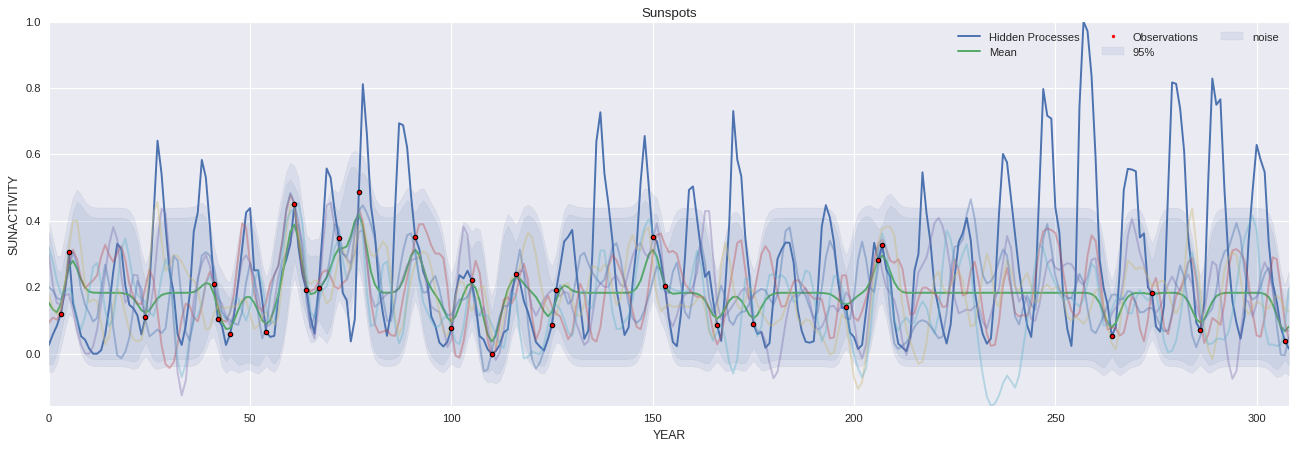

In [87]:
params_map = gp.find_MAP(gp.params_widget, points=4)
gp.plot(params_map, samples=5)
g3.plot_save('images/gp_sunspots2.pdf')
params_map, gp.logp(params_map), gp.scores(params_map, logp=False)

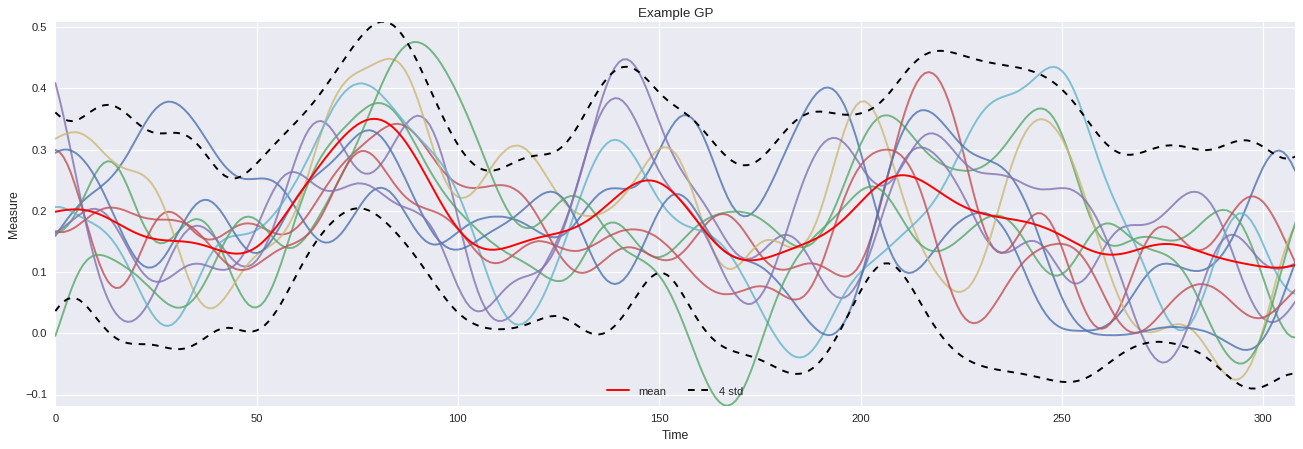

In [79]:
params_map = gp.active.params_default
prediction = gp.predict(params_map, samples=10)
mu, std, samples = prediction.mean, prediction.std, prediction.samples
g3.plot(samples, alpha=0.8)
g3.plot(mu, 'r', label='mean')
g3.plot(mu + 2*std, '--k', label='4 std')
g3.plot(mu - 2*std, '--k')
g3.plot_text('Example GP', 'Time', 'Measure')
g3.plot_save('images/gp_sunspots3.pdf')

In [80]:
gp.active.calc_dimensions()
datatrace = gp.sample_hypers(params_map, samples=2000, chains=gp.ndim*2)
datatrace

Sampling 6 variables, 12 chains, 2000 times (None temps)


100%|██████████| 2000/2000 [00:08<00:00, 228.51it/s]


TGP_BoxShift_power_log_  TGP_BoxShift_shift  TGP_Noise_var_log_  \
0                    -0.019265            1.184828           -3.904497   
1                    -0.033018            1.193989           -3.882822   
2                    -0.050347            1.211479           -3.581514   
3                    -0.050347            1.211479           -3.581514   
4                    -0.050347            1.211479           -3.581514   
5                    -0.050347            1.211479           -3.581514   
6                    -0.050133            1.210225           -3.587268   
7                    -0.053634            1.219524           -3.494515   
8                    -0.053634            1.219524           -3.494515   
9                    -0.036503            1.081186           -3.669297   
10                   -0.047675            1.098986           -3.603761   
11                   -0.055662            1.119189           -3.520756   
12                   -0.038650            1.101362           -3.907415   
13                   -0.045239            1.108267           -3.757654   
14                   -0.054553            1.106173           -3.718295   
15                   -0.058163            1.106722           -3.710375   
16                   -0.029773            1.056286           -3.837780   
17                   -0.029773            1.056286           -3.837780   
18                   -0.029773            1.056286           -3.837780   
19                   -0.068546            1.109936           -3.464074   
20                   -0.068546            1.109936           -3.464074   
21                   -0.349269            1.053077           -4.140495   
22                   -0.540887            1.034640           -4.163918   
23                   -0.604192            0.984267           -4.206440   
24                   -0.949845            0.852093           -4.113663   
25                   -0.949845            0.852093           -4.113663   
26                   -0.972526            0.845121           -4.112779   
27                   -0.972526            0.845121           -4.112779   
28                   -0.980042            0.843191           -4.111204   
29                   -0.980042            0.843191           -4.111204   
...                        ...                 ...                 ...   
23970                 0.052497            3.169790           -4.046531   
23971                 0.052497            3.169790           -4.046531   
23972                 0.052497            3.169790           -4.046531   
23973                 0.052497            3.169790           -4.046531   
23974                 0.054066            3.148049           -4.045779   
23975                 0.054066            3.148049           -4.045779   
23976                 0.054066            3.148049           -4.045779   
23977                 0.054066            3.148049           -4.045779   
23978                 0.054066            3.148049           -4.045779   
23979                 0.054066            3.148049           -4.045779   
23980                 0.054066            3.148049           -4.045779   
23981                 0.054066            3.148049           -4.045779   
23982                 0.054066            3.148049           -4.045779   
23983                 0.054066            3.148049           -4.045779   
23984                 0.054066            3.148049           -4.045779   
23985                 0.054066            3.148049           -4.045779   
23986                 0.054066            3.148049           -4.045779   
23987                 0.054066            3.148049           -4.045779   
23988                 0.054066            3.148049           -4.045779   
23989                 0.054066            3.148049           -4.045779   
23990                 0.054066            3.148049           -4.045779   
23991                 0.054066            3.148049           -4.045779   
23992      

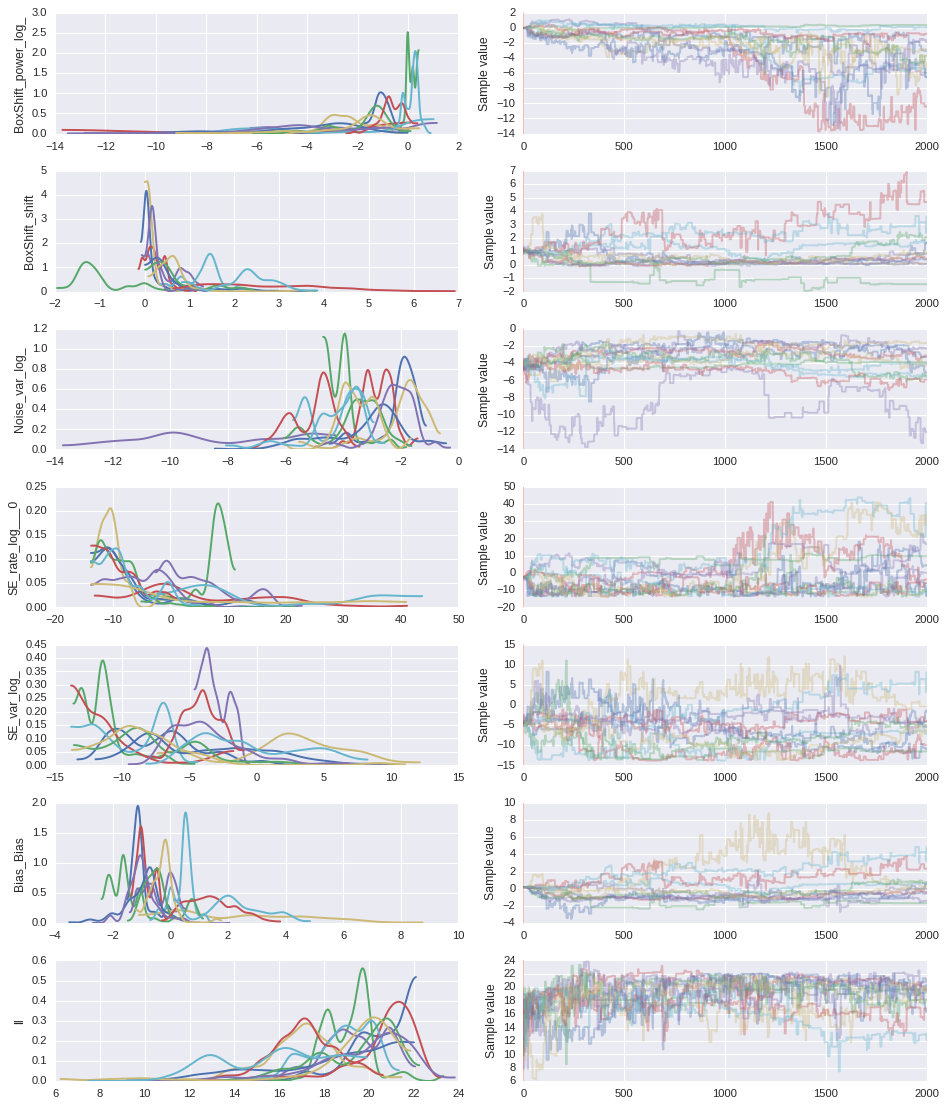

In [81]:
g3.style_seaborn()
g3.plot_datatrace(datatrace)

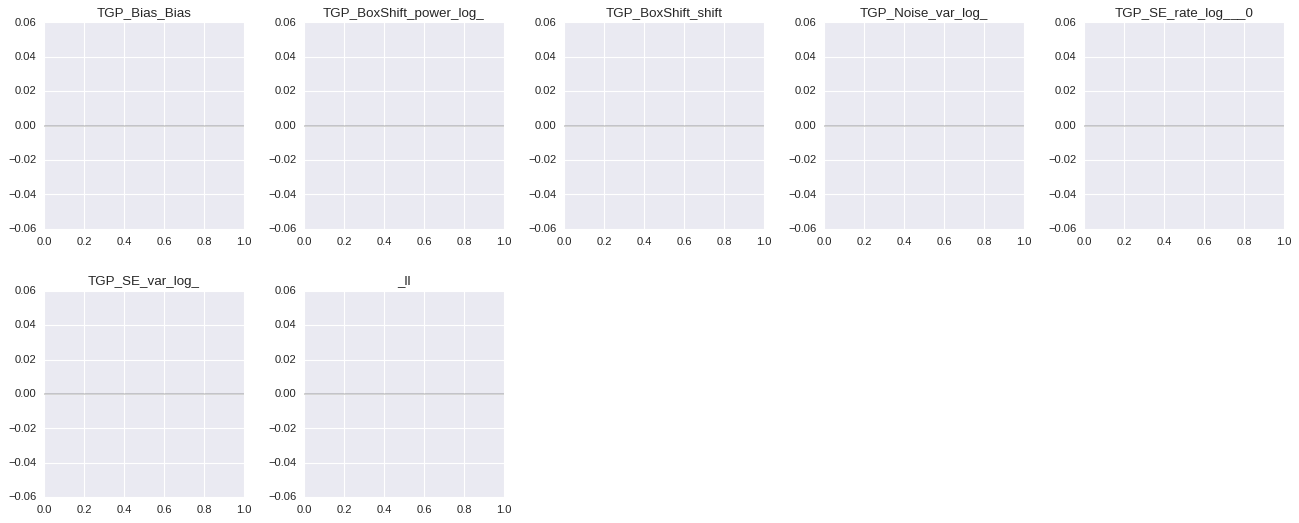

In [82]:
g3.hist_datatrace(datatrace)

In [83]:
g3.cluster_datatrace(gp, datatrace, n_components=5)

ValueError: Found array with 0 sample(s) (shape=(0, 6)) while a minimum of 1 is required.

In [ ]:
g3.scatter_datatrace(datatrace)

In [ ]:
dt_conditional = g3.conditional(datatrace, lambda df: df['_ll'] > datatrace['_ll'].median())
g3.scatter_datatrace(dt_conditional)
kde = g3.datatrace_to_kde(gp, dt_conditional)
g3.scatter_datatrace(g3.kde_to_datatrace(gp, kde, nsamples=len(dt_conditional)))

In [ ]:
modes = g3.find_candidates(datatrace, cluster=True)
modes

In [ ]:
for k in modes.T:
    params = gp.active.params_datatrace(modes, k)
    print(params, gp.logp(params), gp.scores(params, logp=False))
    gp.plot(params)
    g3.show()

In [ ]:
#TODO: predict(chain)

In [ ]:
#TODO: mean BlackBox

In [ ]:
return

In [ ]:
gp.plot_model(params)

# Gaussian Random Fields

In [ ]:
g3.style_seaborn()

name_data = 'abalone'
names=['Sex','Length', 'Diam', 'Height', 'Whole', 'Shucked', 'Viscera','Shell','Rings']
abalone = pd.read_csv('data/abalone.csv', names=names)
#abalone['Sex'] = (abalone['Sex'] == 'M')*-1.0 + (abalone['Sex'] == 'F')*1.0 + 0.0
abalone = abalone.drop('Sex', axis=1) # Drop categoric variable
x = abalone.drop('Rings', axis=1).values.astype(dtype=np.float32)
y = abalone['Rings'].values.astype(dtype=np.float32)
p_obs = 0.3*0.2395
obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, p_obs)

In [ ]:
gp = g3.GaussianProcess(x.shape[1], g3.Bias(), g3.SE(x_obs), hidden=y, file='models/01-'+name_data+'_GP.g3')
gp.describe(name_data+' GP','time','measure','GP')
gp.observed(x_obs, y_obs, obs_j)
gp.set_space(x, y)
gp.plot(plot_space=True)

In [ ]:
params = gp.find_MAP(points=4)
gp.set_params(params)

In [ ]:
print('Test:   ', gp.scores(gp.get_params_test()))
print('Default:', gp.scores(gp.get_params_default()))
print('Current:', gp.scores(gp.get_params_current()))
gp.plot()